In [5]:
import matplotlib.pyplot as plt
import random
from scipy.io import loadmat
import os

# Q3

In [7]:
# Load the dataset

path_train = os.path.join(os.getcwd(), 'W7/mnist_train.mat')
path_test = os.path.join(os.getcwd(), 'W7/mnist_test.mat')

# Load .mat file
train_data = loadmat(path_train)
test_data = loadmat(path_test)

# Extract the images and labels
train_images, train_labels, test_images, test_labels = train_data['train_X'], train_data['train_labels'] - 1, test_data['test_X'], test_data['test_labels'] - 1

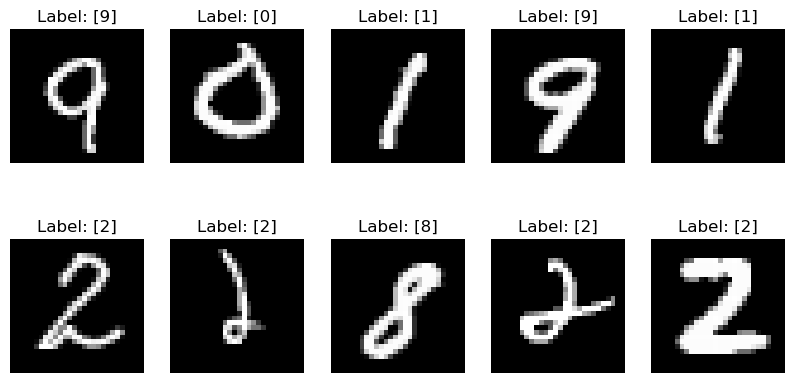

In [8]:
# Visualise dataset

# Reshape the images to their original 28x28 format
images_reshaped = train_images.reshape((-1, 28, 28))

# Visualize the first few images along with their labels
plt.figure(figsize=(10, 5))
for i in range(10):  # Visualize 10 samples
    plt.subplot(2, 5, i + 1)
    random_integer = random.randint(0, len(train_images))
    plt.imshow(images_reshaped[random_integer], cmap='gray')
    plt.title(f"Label: {train_labels[random_integer]}")
    plt.axis('off')
plt.show()

In [17]:
print(train_images.shape)

(60000, 784)


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# TODO: Standardize the data

scaler_train = StandardScaler()

scaler_train.fit(train_images)

standard_train_images = scaler_train.transform(train_images)

scaler_test = StandardScaler()

scaler_test.fit(test_images)

standard_test_images = scaler_test.transform(test_images)

In [30]:
# TODO: Define MLP model by specifying all necessary parameters
mlp_clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32, 10), max_iter=100, learning_rate_init=5e-4, early_stopping=True, validation_fraction=0.3)

# TODO: Train the classifier

mlp_clf.fit(standard_train_images, train_labels.ravel())

predict_train = mlp_clf.predict(standard_train_images)

# TODO: Predict on the test set

predict_test = mlp_clf.predict(standard_test_images)

# TODO: Calculate the model accuracy (ideally can do this for both train and test sets)

accuracy_train = accuracy_score(train_labels, predict_train)
accuracy_test = accuracy_score(test_labels, predict_test)

print(f'Training Accuracy: {accuracy_train}')
print(f'Test Accuracy: {accuracy_test}')

Training Accuracy: 0.99165
Test Accuracy: 0.9708


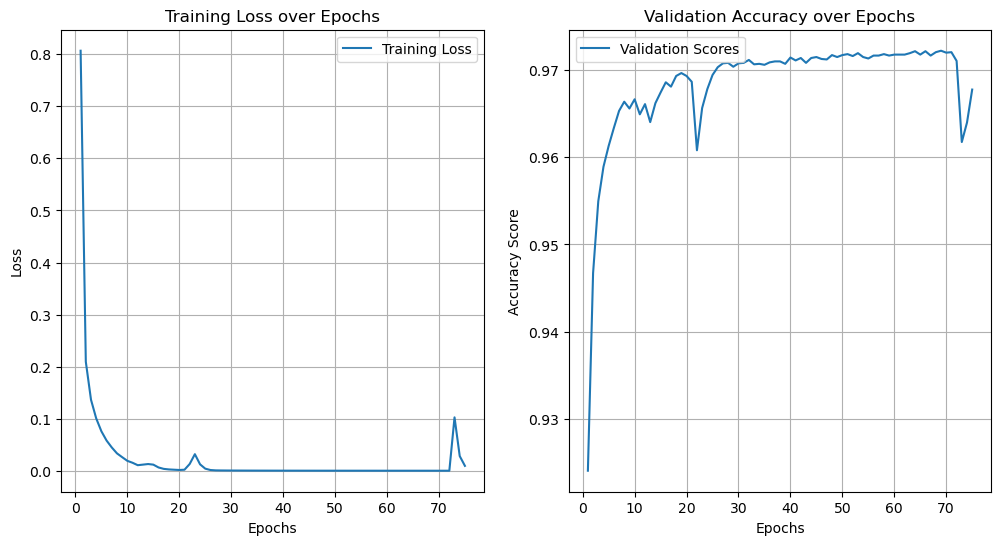

In [35]:
# TODO: Show loss plots

epochs=[i + 1 for i in range(mlp_clf.n_iter_)]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, mlp_clf.loss_curve_, label='Training Loss')

plt.legend()
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'Training Loss over Epochs')

plt.subplot(1, 2, 2)
plt.plot(epochs, mlp_clf.validation_scores_, label='Validation Scores')

plt.legend()
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy Score')
plt.title(f'Validation Accuracy over Epochs')

plt.show()

# Q4

In [39]:
mlp_clf.coefs_[1].shape

(128, 64)

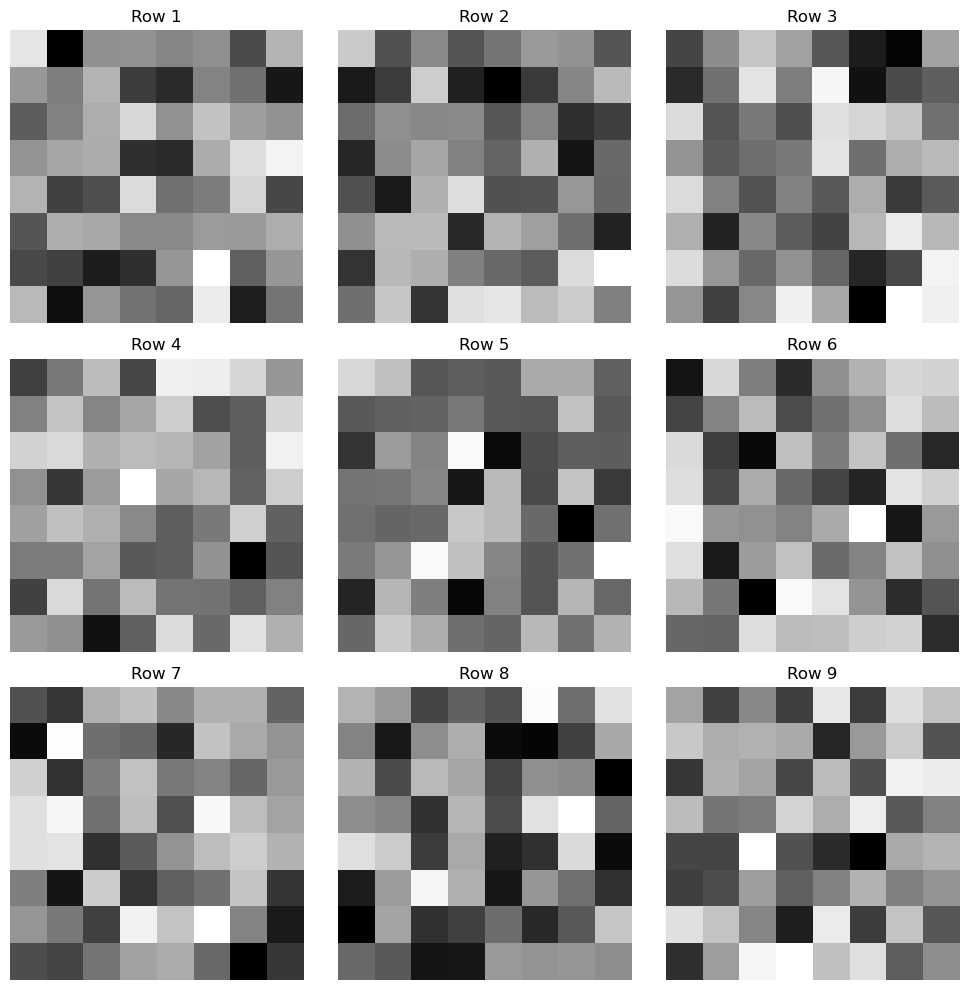

In [38]:
# TODO: Get the weight matrix of the first hidden layer
weight_matrix = mlp_clf.coefs_[1]

# Visualize 9 rows of the weight matrix
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    # Normalize the weights to [0, 1]
    weights_normalized = (weight_matrix[i] - weight_matrix[i].min()) / (weight_matrix[i].max() - weight_matrix[i].min())
    # Reshape the weights to 28x28 to visualize as an image
    weights_image = weights_normalized.reshape(8, 8)
    plt.imshow(weights_image, cmap='gray')
    plt.title(f"Row {i + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()